<a href="https://colab.research.google.com/github/sebastiangarcia200/AI_IB_AGODIC2024/blob/main/ASSIGMENTS/ASSIGNMENT_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SEBASTIÁN GARCÍA SOTO 1801497
Assignment 7. Convolutional Neural Network.
GROUP: 002 THURSDAY N4-N6

In [3]:
#IMPORT LIBRARIES
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#LOAD DATA
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
#DATA PROCESSING
train_data = train_data.astype("float32") / 255.0
test_data = test_data.astype("float32") / 255.0


train_data = train_data[..., np.newaxis]
test_data = test_data[..., np.newaxis]

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [7]:
#CNN Architecture
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#Compile Model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [9]:
#Model Training
history = cnn_model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 78ms/step - accuracy: 0.8508 - loss: 0.4947 - val_accuracy: 0.9772 - val_loss: 0.0753
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.9806 - loss: 0.0601 - val_accuracy: 0.9834 - val_loss: 0.0532
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.9858 - loss: 0.0443 - val_accuracy: 0.9878 - val_loss: 0.0443
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 78ms/step - accuracy: 0.9897 - loss: 0.0322 - val_accuracy: 0.9865 - val_loss: 0.0450
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.9926 - loss: 0.0248 - val_accuracy: 0.9901 - val_loss: 0.0334
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9894 - val_loss: 0.0393
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.9947 - loss: 0.0174 - val_accuracy: 0.9898 - val_loss: 0.0391
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.9952 - loss: 0.0136 - 

In [10]:
#Model Evaluation
test_loss, test_accuracy = cnn_model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9884 - loss: 0.0399
Test accuracy: 0.9905999898910522


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Prediction: 7, Actual: 7


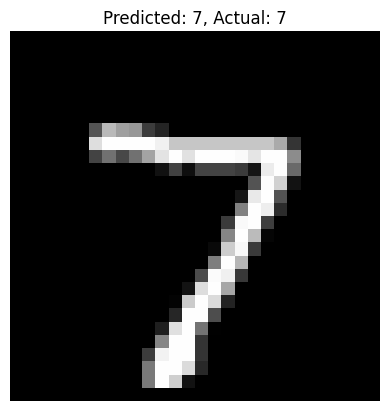

Prediction: 2, Actual: 2


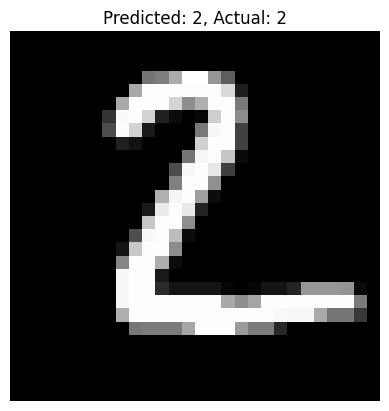

Prediction: 1, Actual: 1


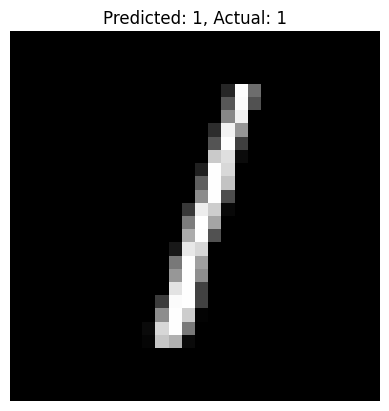

Prediction: 0, Actual: 0


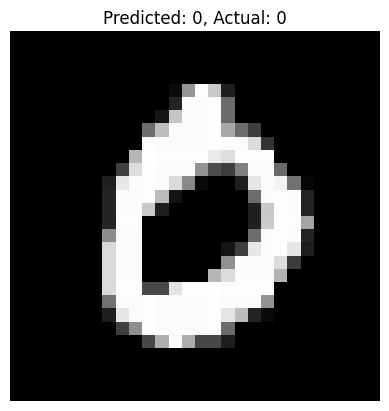

Prediction: 4, Actual: 4


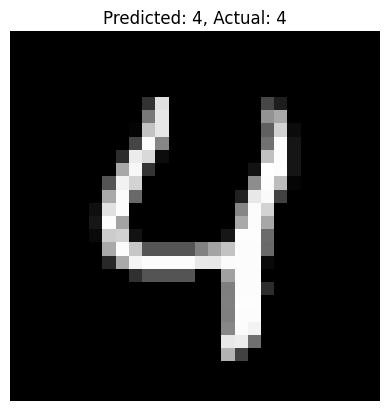

In [11]:
#RESULTS AND PREDICTIONS
predictions = cnn_model.predict(test_data[:5])

for i in range(5):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(test_labels[i])
    print(f"Prediction: {predicted_label}, Actual: {actual_label}")
    plt.imshow(test_data[i].reshape(28, 28), cmap="gray")
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    plt.axis('off')
    plt.show()